<h1>DATA ANALYTICS PROJECT </h1>

<h2>PHILIPPINES DENGUE RECORD</h2>
<h3>Inclusie year: 2016 - 2020</h3>
<h4>Analyst : Mark Eugine M. Casañada</h4>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2>Importing Libraries</h2>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings 
warnings.filterwarnings('ignore')

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2>Data Preparation</h2>

In [4]:
dengue = pd.read_csv('dataset/dengue.csv')

In [5]:
dengue.head(2)

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0


<h2>Checking and filling up null values</h2>

In [6]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h3 style="color: #90E0EF">No null values</h3>

<h2>Changing data types to necessary data types</h2>

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [8]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [9]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h2>Defining the list of month, year and regions for sorted value counts.</h2>

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

years = [2016, 2017, 2018, 2019, 2020]

regions = [
    "BARMM",
    "CAR",
    "NCR",
    "Region I",
    "Region II",
    "Region III",
    "Region IV-A",
    "Region IV-B",
    "Region V",
    "Region VI",
    "Region VII",
    "Region VIII",
    "Region IX",
    "Region X",
    "Region XI",
    "Region XII",
    "Region XIII"
]

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2 style='color:yellow;font-size:40px'>INSIGHTS</h2>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>What is the total number of dengue cases recorded each Year?</h3>

In [148]:
print('Total number of dengue cases recorded each year.\n')

yearly_cases_list = dengue.groupby(['Year'])['Dengue_Cases'].sum().reset_index()
yearly_cases_list

Total number of dengue cases recorded each year.



,Year,Dengue_Cases
0,2016,209544
1,2017,154155
2,2018,250783
3,2019,441902
4,2020,91041


<h3><span style='color: #90E0EF'>Visualization: </span>What is the total number of dengue cases recorded each Year?</h3>

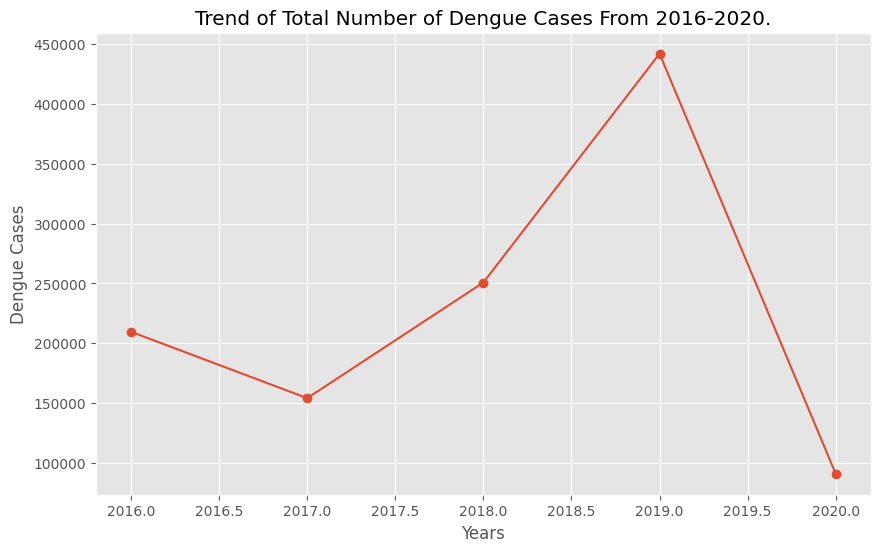

In [207]:
plt.plot(yearly_cases_list['Year'], yearly_cases_list['Dengue_Cases'], marker='o')
plt.title("Trend of Total Number of Dengue Cases From 2016-2020.")
plt.ylabel("Dengue Cases")
plt.xlabel("Years")
plt.gcf().set_size_inches(10, 6)
plt.style.use('ggplot')
plt.show()

<h3><span style='color: #52b788'>Insight #1 :</span> The total number of dengue cases shows significant variability across the years, with a peak in 2019 (441,902 cases) and a substantial drop in 2020 (91,041 cases). This suggests that external factors, such as changes in climate, public health interventions, or reporting practices, may have influenced the trend.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>What is the total number of dengue cases recorded each Monthly?</h3>

In [208]:
print('Total number of dengue cases recorded each month.\n')

monthly_cases_list = dengue.groupby(['Month'])['Dengue_Cases'].sum().reset_index()

# Sort the month accordingly
monthly_cases_list['Month'] = pd.Categorical(monthly_cases_list['Month'], categories=month_order, ordered=True)
monthly_cases_list = monthly_cases_list.sort_values(by='Month')
monthly_cases_list

Total number of dengue cases recorded each month.



,Month,Dengue_Cases
4,January,84328
3,February,77801
7,March,57576
0,April,32508
8,May,32387
6,June,58110
5,July,138242
1,August,187554
11,September,177943
10,October,117645


<h3><span style='color: #90E0EF'>Visualization: </span>What is the total number of dengue cases recorded each Monthly?</h3>

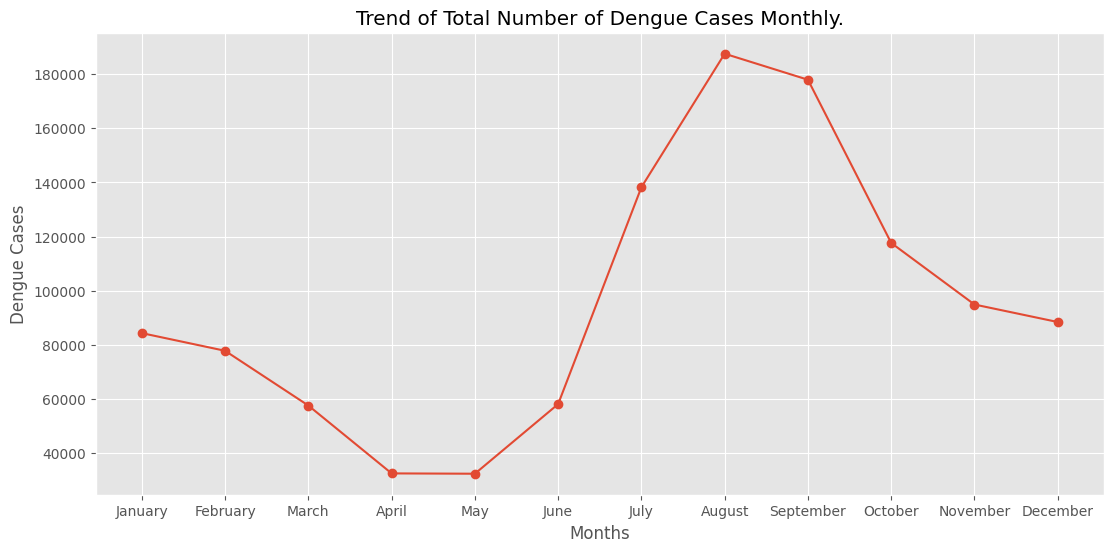

In [209]:
plt.plot(monthly_cases_list['Month'], monthly_cases_list['Dengue_Cases'], marker='o')
plt.title("Trend of Total Number of Dengue Cases Monthly.")
plt.ylabel("Dengue Cases")
plt.xlabel("Months")
plt.gcf().set_size_inches(13, 6)
plt.show()

<h3><span style='color: #52b788'>Insight #2 : </span>The total number of dengue cases shows a clear seasonal pattern, with the highest monthly totals occurring in August (187,554 cases) and September (177,943 cases). This suggests that climatic conditions during these months—such as higher temperatures and rainfall—are conducive to mosquito breeding and virus transmission.</h3>

<h3><span style='color: #52b788'>Insight #3 : </span>The data reveals a notable increase in dengue cases from July onward, peaking in August and September. This trend underscores the importance of implementing targeted preventive measures, such as vector control and public awareness campaigns, during these high-risk months to mitigate the spread of the disease.</h3>

<h3><span style='color: #52b788'>Insight #4 : </span>Months like May and June have significantly lower case counts (32,387 and 58,110, respectively), indicating a potential lull in dengue activity. This could be due to cooler temperatures or other environmental factors that reduce mosquito populations or transmission rates during this period.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>Which region has the highest number of dengue cases?</h3>

In [210]:
print('Total number of dengue cases recorded each region.\n')

regions_cases_list = []

for region in regions:
    region_cases = dengue[dengue['Region'] == region]
    x = region_cases['Dengue_Cases'].sum()
    regions_cases_list.append(x)
    print(f"{region} : {x}")

Total number of dengue cases recorded each region.

BARMM : 11537
CAR : 30582
NCR : 115966
Region I : 59066
Region II : 45141
Region III : 131064
Region IV-A : 163029
Region IV-B : 30849
Region V : 22167
Region VI : 117523
Region VII : 110683
Region VIII : 51983
Region IX : 47781
Region X : 82437
Region XI : 32522
Region XII : 59802
Region XIII : 35293


<h3><span style='color: #90E0EF'>Visualization: </span>Which region has the highest number of dengue cases</h3>

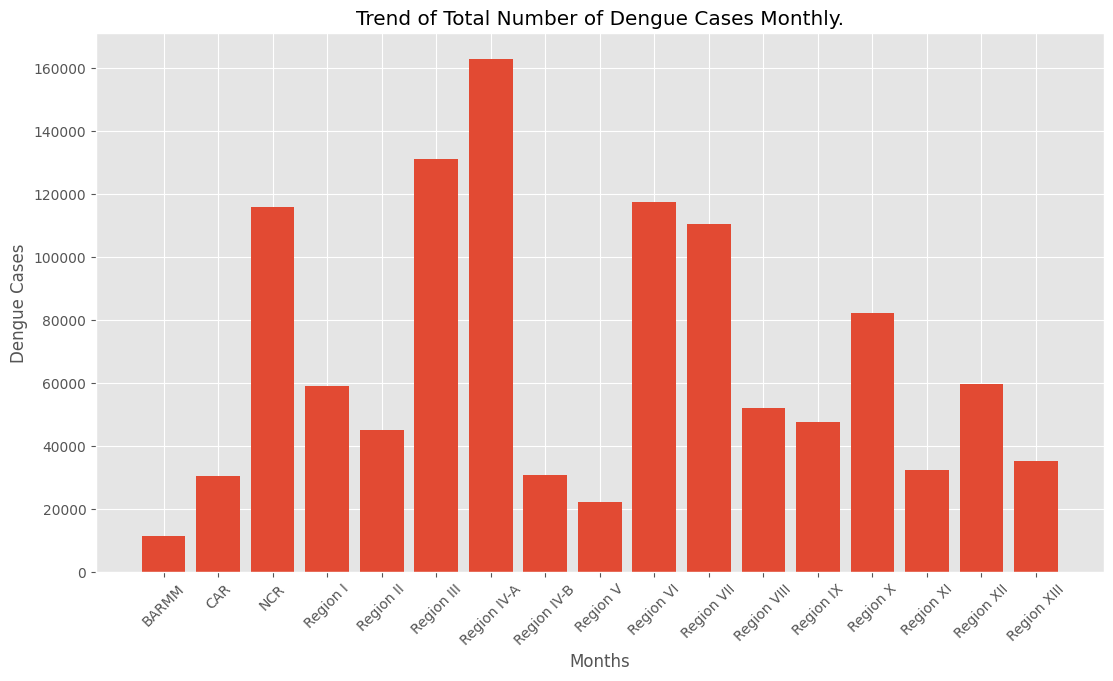

In [211]:
plt.bar(regions, regions_cases_list)

plt.title("Trend of Total Number of Dengue Cases Monthly.")
plt.ylabel("Dengue Cases")
plt.xlabel("Months")
plt.gcf().set_size_inches(13, 7)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #5 : </span>Region IV-A has the most dengue cases (165,029) . This region is a major hotspot for dengue, likely due to factors like crowded cities, poor sanitation, or weather conditions that help mosquitoes breed.</h3>

<h3><span style='color: #52b788'>Insight #6 : </span>CAR (Cordillera Administrative Region) has the fewest dengue cases (30,582) . This suggests that the region might have fewer people living there, better ways to control mosquitoes, or natural conditions that don’t support mosquito breeding as much. Learning from these factors could help reduce dengue in other areas.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>What is the average number of deaths in the past 5 years (2016-2020)?</h3>

In [212]:
average_death = dengue['Dengue_Deaths'].mean()
print(np.round(average_death, 2))

16.51


<h3><span style='color: #90E0EF'>Visualization: </span>What is the average number of deaths in the past 5 years (2016-2020)?</h3>

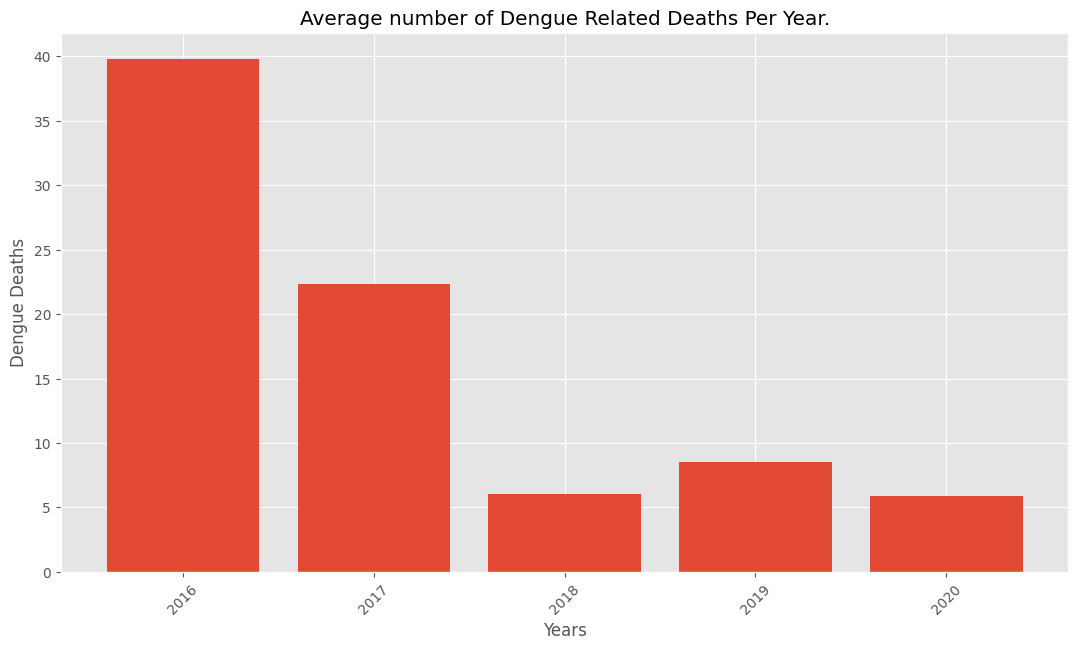

In [213]:
x = dengue.groupby(['Year'])['Dengue_Deaths'].mean().reset_index()
plt.bar(x['Year'], x['Dengue_Deaths'])
plt.title("Average number of Dengue Related Deaths Per Year.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Years")
plt.gcf().set_size_inches(13, 7)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #7 : </span>Over the past five years, the average number of dengue-related deaths has been 16.51 which peak in 2016. This indicates a relatively consistent fatality rate despite potential fluctuations in dengue cases. Monitoring this trend can help assess the effectiveness of healthcare interventions and outbreak control measures.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>The highest number of death recorded.</h3>

In [214]:
highest_death = dengue['Dengue_Deaths'].max()
print(highest_death)

1651


<h3><span style='color: #90E0EF'>Visualization: </span>The highest number of death recorded.</h3>

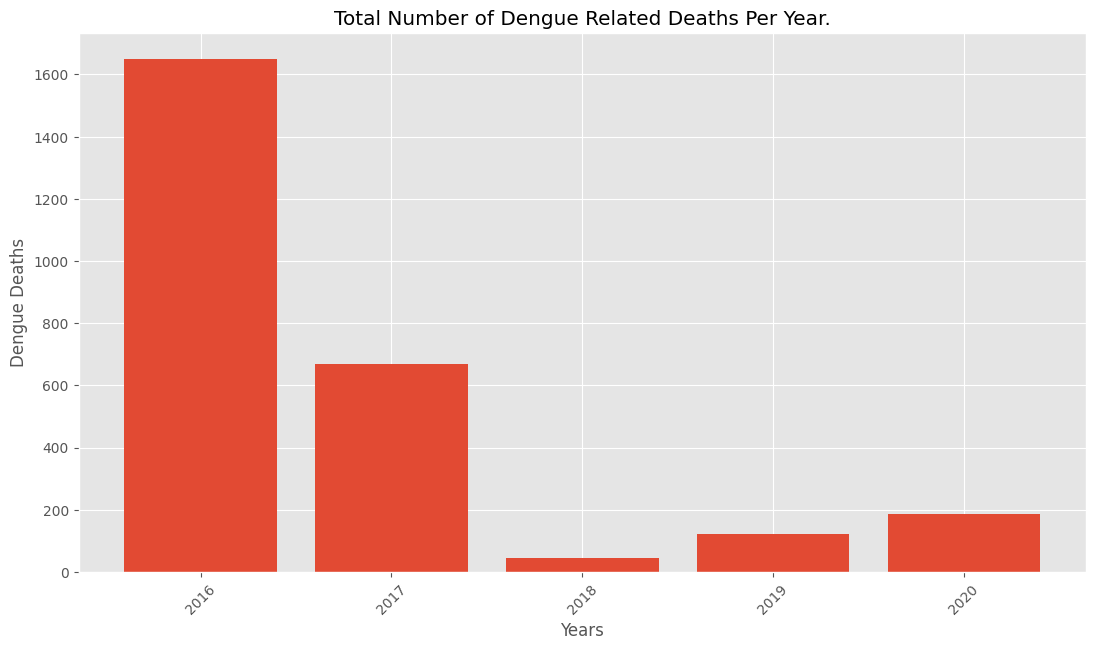

In [215]:
x = dengue.groupby(['Year'])['Dengue_Deaths'].max().reset_index()
plt.bar(x['Year'], x['Dengue_Deaths'])
plt.title("Total Number of Dengue Related Deaths Per Year.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Years")
plt.gcf().set_size_inches(13, 7)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #8 : </span>The highest recorded number of dengue-related deaths is 1,651 in 2016, highlighting a severe impact on public health. This peak may indicate a particularly intense outbreak, potential delays in medical intervention, or strain on healthcare resources. Analyzing the factors contributing to this high fatality rate can help improve future dengue prevention and treatment efforts.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>The highest number of dengue cases recorded.</h3>

In [216]:
highest_cases = dengue['Dengue_Cases'].max()
print(highest_cases)

21658


<h3><span style='color: #90E0EF'>Visualization: </span>The highest number of dengue cases recorded.</h3>

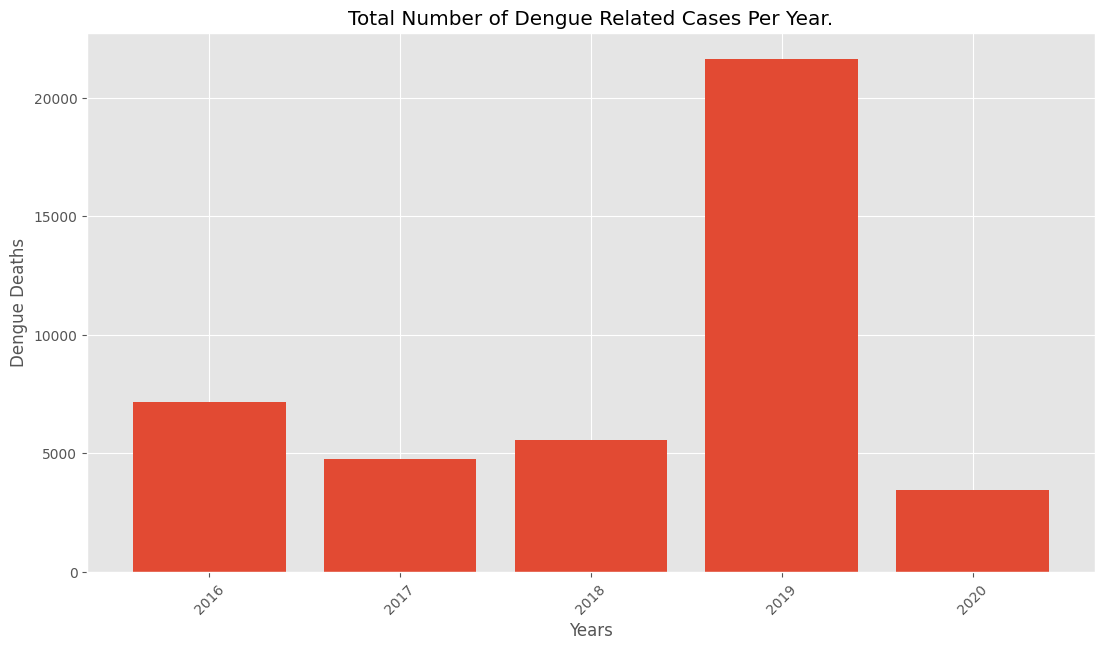

In [217]:
x = dengue.groupby(['Year'])['Dengue_Cases'].max().reset_index()
plt.bar(x['Year'], x['Dengue_Cases'])
plt.title("Total Number of Dengue Related Cases Per Year.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Years")
plt.gcf().set_size_inches(13, 7)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #9 : </span>The highest recorded number of dengue cases is 21,658 in 2019, marking a significant outbreak. This peak suggests a severe dengue surge that may have been influenced by environmental, seasonal, or healthcare factors. Understanding the conditions that led to this spike can help improve future prevention and response strategies.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>Is the average dengue death changes depends on the year?</h3>

In [218]:
average_deaths_yearly = dengue.groupby(['Year'])['Dengue_Deaths'].mean().reset_index()

print('The Average Deaths Per Year.')
average_deaths_yearly

The Average Deaths Per Year.


,Year,Dengue_Deaths
0,2016,39.838235
1,2017,22.367647
2,2018,6.009804
3,2019,8.495098
4,2020,5.857843


<h3><span style='color: #90E0EF'>Visualization: </span>Is the average dengue death changes depends on the year?</h3>

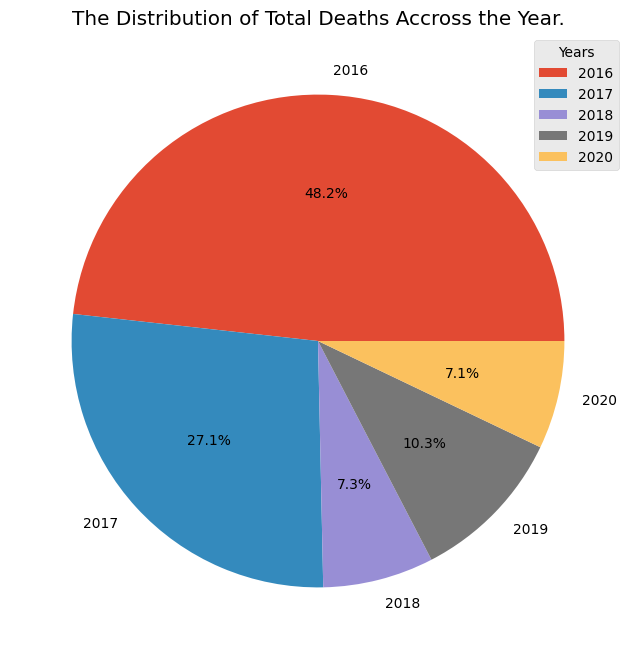

In [219]:
years = average_deaths_yearly['Year']
average_deaths = average_deaths_yearly['Dengue_Deaths']

plt.pie(average_deaths, labels=years, autopct='%1.1f%%')
plt.title("The Distribution of Total Deaths Accross the Year.")
plt.gcf().set_size_inches(8, 8)
plt.legend(title='Years')
plt.show()

<h3><span style='color: #52b788'>Insight #10 : </span>Base on the analysis the average recorded death changes each year from 39.84 (48.2%) of 2016 to 5.86 (7.1%) average death of 2020. This indicates that the average death got lower as the year past by, reflecting that approach of government through preventing dengue works as the analysis revelse the drop in the average death each year.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span>What is the average dengue deaths each month?</h3>

In [220]:
print('Average dengue death recorded each month.\n')
monthly_death_ave = dengue.groupby(['Month'])['Dengue_Deaths'].mean().reset_index()

# Sort the month accordingly
monthly_death_ave['Month'] = pd.Categorical(monthly_death_ave['Month'], categories=month_order, ordered=True)
monthly_death_ave = monthly_death_ave.sort_values(by='Month')
monthly_death_ave

Average dengue death recorded each month.



,Month,Dengue_Deaths
4,January,4.635294
3,February,3.705882
7,March,3.423529
0,April,2.352941
8,May,1.905882
6,June,3.788235
5,July,7.188235
1,August,8.400000
11,September,72.329412
10,October,78.470588


<h3><span style='color: #90E0EF'>Visualization: </span>What is the average dengue deaths each month?</h3>

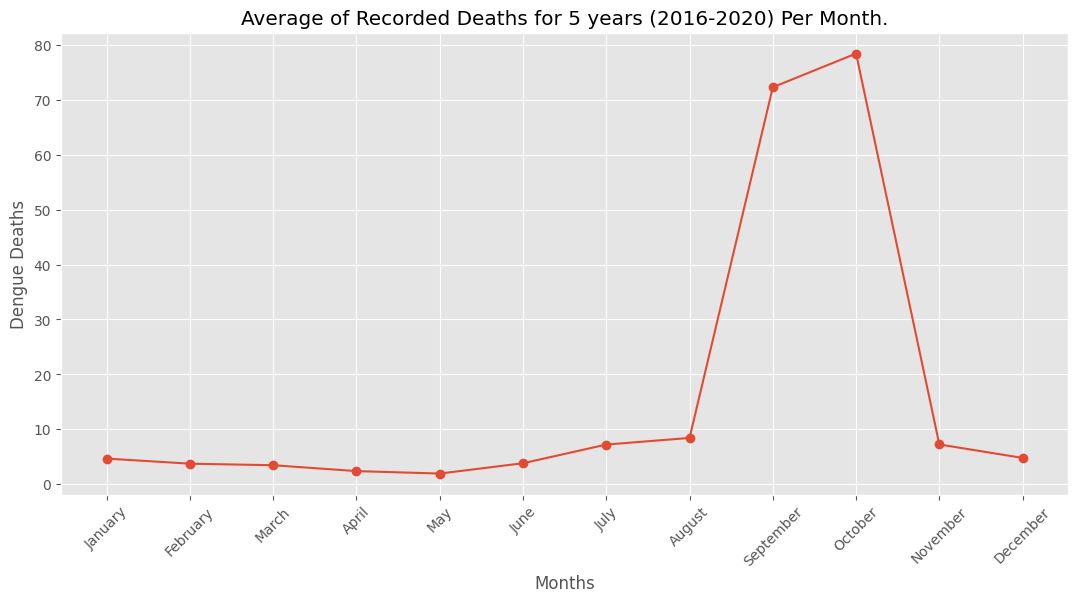

In [221]:
plt.plot(monthly_death_ave['Month'], monthly_death_ave['Dengue_Deaths'], marker='o')
plt.title("Average of Recorded Deaths for 5 years (2016-2020) Per Month.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Months")
plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #11: </span> The highest average dengue deaths occur in September and October, likely due to favorable conditions for mosquito breeding and virus transmission. This seasonal trend underscores the need for targeted public health measures during these peak months to reduce dengue-related fatalities.</h3>

<h3><span style='color: #52b788'>Insight #12 : </span> Months like May and June have the lowest average dengue deaths (1.91 and 3.79, respectively), which could be attributed to cooler temperatures or lower mosquito activity during these periods. These findings emphasize the importance of understanding seasonal patterns to tailor public health interventions effectively.</h3>



<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span> Correlaton between Dengue Cases and Deaths.</h3>

In [222]:
cases_death_corr = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
round_cases_death_corr = np.round(cases_death_corr,2)

print(round_cases_death_corr)

0.04


<h3><span style='color: #90E0EF'>Visualization: </span> Correlaton between Dengue Cases and Deaths.</h3>

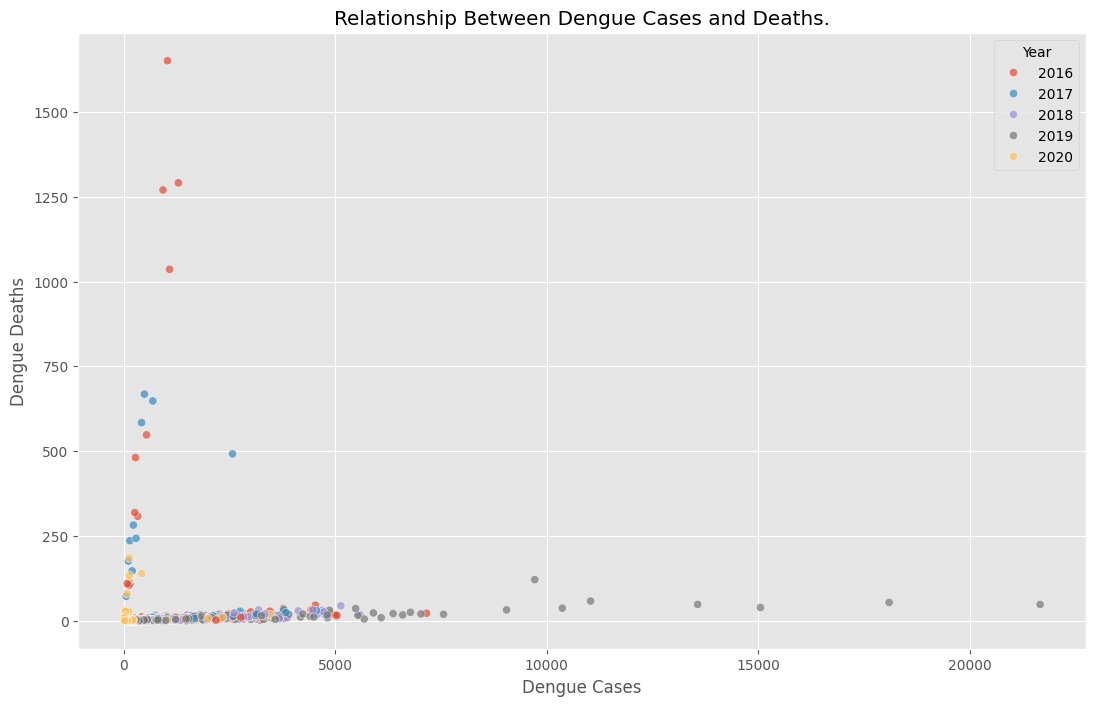

In [223]:
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', alpha=0.7)
plt.title("Relationship Between Dengue Cases and Deaths.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.gcf().set_size_inches(13, 8)
plt.show()

<h3><span style='color: #52b788'>Insight #13 : </span>The correlation between dengue cases and deaths is 0.04, indicating a very weak relationship. This suggests that the number of dengue cases does not strongly predict the number of deaths, highlighting the potential influence of other factors such as healthcare access, treatment quality, and underlying health conditions on mortality rates.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span> Details about the data that got the highest number of dengue deaths.</h3>

In [224]:
highest_number_deaths = dengue['Dengue_Deaths'].max()

highest_deaths_detials = dengue[dengue['Dengue_Deaths'] == highest_number_deaths]
highest_deaths_detials

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
849,October,2016,NCR,1033,1651


<h3><span style='color: #90E0EF'>Visualization: </span>Details about the data that got the highest number of dengue deaths.</h3>

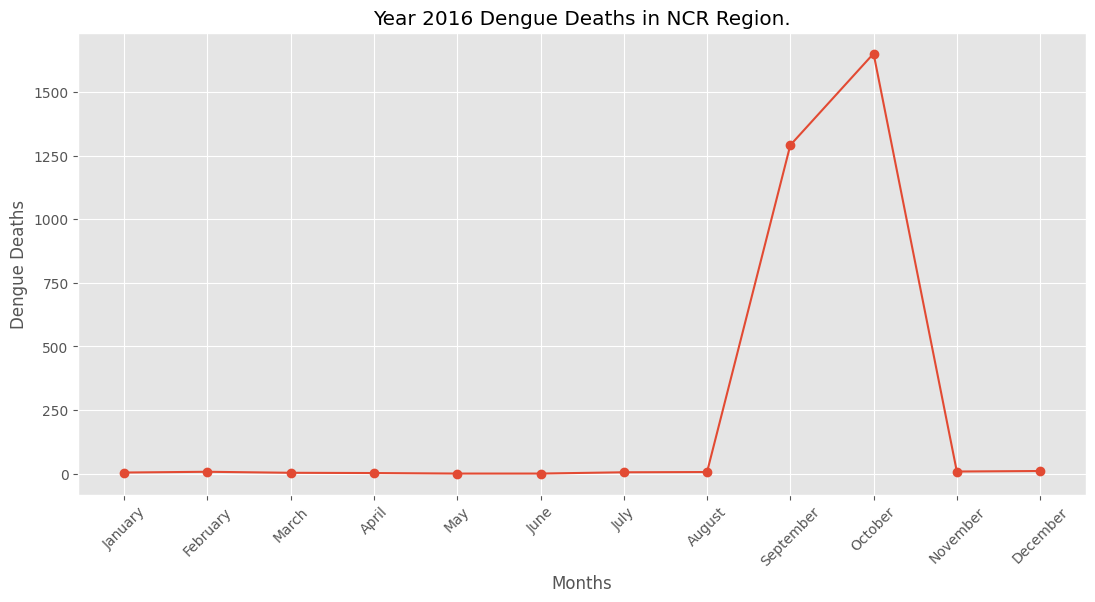

In [225]:
d_1k_2016 = dengue[(dengue['Year'] == 2016) & (dengue['Region'] == 'NCR')]
plt.plot(month_order, d_1k_2016['Dengue_Deaths'], marker='o')
plt.title("Year 2016 Dengue Deaths in NCR Region.")
plt.ylabel("Dengue Deaths")
plt.xlabel("Months")
plt.gcf().set_size_inches(13, 6)
plt.xticks(rotation=45)
plt.show()

<h3><span style='color: #52b788'>Insight #14 : </span>The peak in dengue deaths (1,651) happened in October 2016 , indicating that this month and year were especially dangerous for dengue-related fatalities. Understanding these specific dates can help authorities prepare better for similar outbreaks in the future by implementing timely interventions.</h3>

<h3><span style='color: #52b788'>Insight #15 : </span>The region with the highest dengue deaths (1,651) was the National Capital Region (NCR) , where there were also 1,033 dengue cases reported. This suggests that densely populated urban areas like NCR are more vulnerable to dengue outbreaks, likely due to factors such as crowded living conditions and limited access to preventive measures.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span> List of Years and Month that got the 1,000 or more nubmer of dengue cases.</h3>

In [226]:
cases_1000 = dengue[dengue['Dengue_Cases'] >= 1000]
group_one = cases_1000.groupby(['Year', 'Month']).size().unstack()

# Sorted month
group_one = group_one.reindex(columns=month_order)

In [227]:
group_one

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,7,4,2,0,0,4,11,11,9,8,7,5
2017,6,5,2,1,0,1,6,7,5,4,3,3
2018,3,3,3,0,0,3,11,11,13,10,10,11
2019,9,11,10,1,4,9,15,16,16,12,9,7
2020,4,7,5,0,0,0,0,3,2,1,2,2


<h3><span style='color: #90E0EF'>Visualization: </span>List of Years and Month that got the 1,000 or more nubmer of dengue cases.</h3>

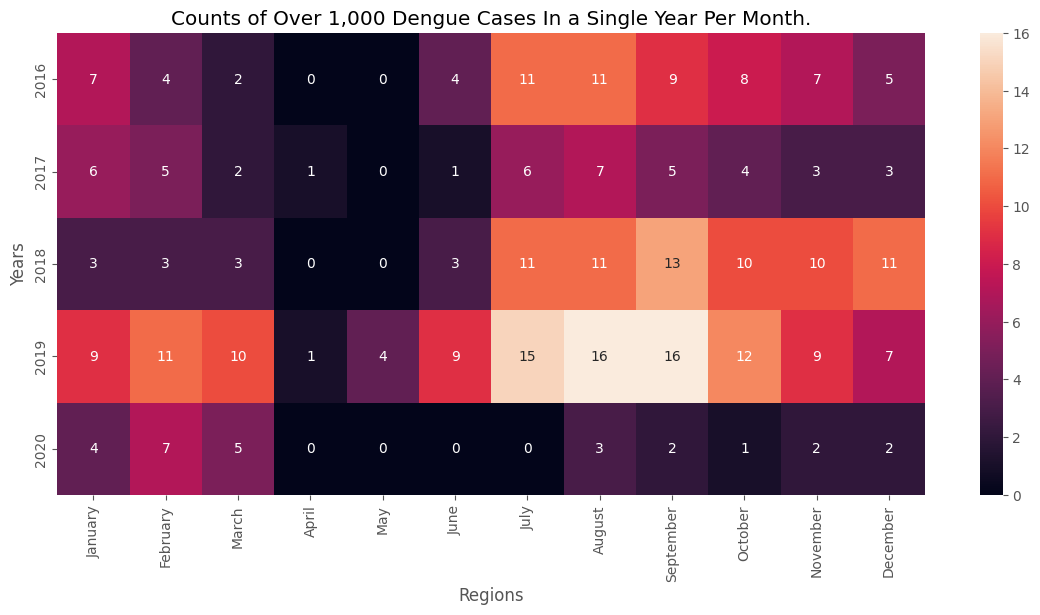

In [228]:
sns.heatmap(group_one, annot=True, fmt='g')
plt.title("Counts of Over 1,000 Dengue Cases In a Single Year Per Month.")
plt.ylabel("Years")
plt.xlabel("Regions")
plt.gcf().set_size_inches(14,6)
plt.show()

<h3><span style='color: #52b788'>Insight #16 : </span> The data shows that August and September consistently has the highest number of months with over 1,000 dengue cases , especially in 2018 and 2019. This suggests that this months is a critical month for dengue outbreaks, likely due to favorable weather conditions like heavy rainfall or high temperatures.</h3>

<h3><span style='color: #52b788'>Insight #17 : </span> April and May have very few months with over 1,000 cases , indicating these months may have lower mosquito activity or fewer conducive environmental factors for dengue transmission. This seasonal pattern highlights the importance of focusing preventive measures during peak months like August and September.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span> Highest number of dengue cases in different region per year.</h3>

In [229]:
group_two = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].max().unstack()

In [230]:
group_two

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Year,,,,,,,,,,,,,,,,,
2016,491,2769,2291,1598,754,3194,3454,778,1025,378,7155,4531,921,2897,2330,3251,1116
2017,74,841,4555,1609,990,4764,3121,412,882,508,2291,2750,620,1354,847,1512,537
2018,412,1330,5131,3374,3698,5581,4697,1650,810,547,2846,4725,2261,3864,956,1195,2310
2019,811,1536,11033,4814,2446,9713,21658,2125,7024,2846,18090,5534,7557,4807,1284,3579,2047
2020,233,229,2328,1212,436,3091,3175,1048,593,404,784,3464,1500,1150,352,703,1172


<h3><span style='color: #90E0EF'>Visualization: </span>Highest number of dengue cases in different region per year.</h3>

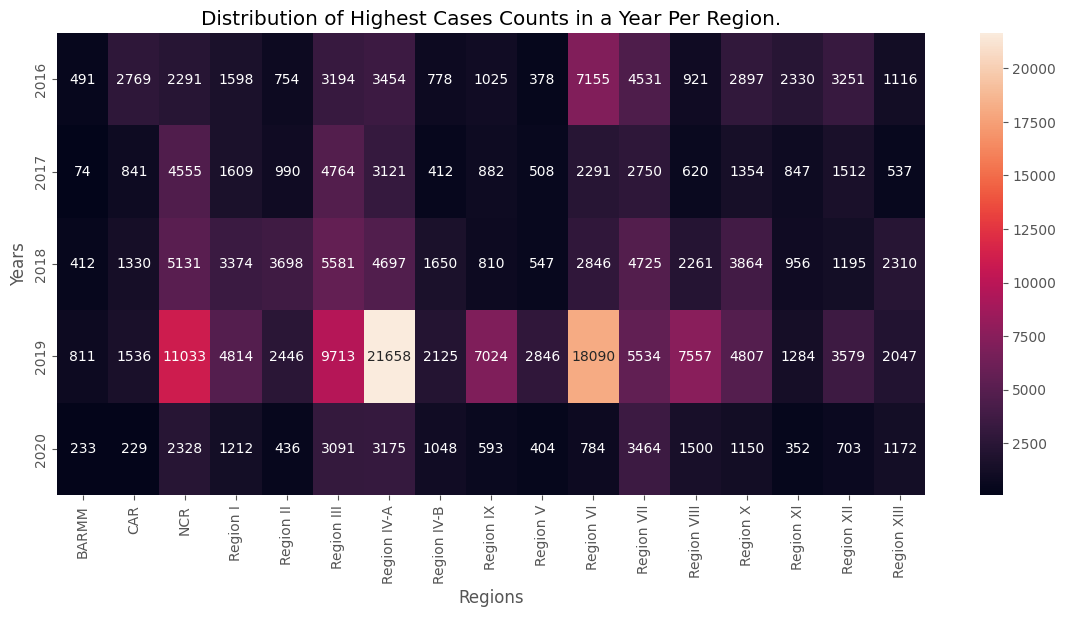

In [231]:
sns.heatmap(group_two, annot=True, fmt='g')
plt.title("Distribution of Highest Cases Counts in a Year Per Region.")
plt.ylabel("Years")
plt.xlabel("Regions")
plt.gcf().set_size_inches(14,6)
plt.show()

<h3><span style='color: #52b788'>Insight #18 : </span>The highest number of dengue cases in Region IV-A consistently exceeds other regions, peaking at 21,658 cases in 2019. This suggests that Region IV-A is a major hotspot for dengue outbreaks, likely due to factors such as population density or environmental conditions favorable for mosquito breeding.</h3>

<h3><span style='color: #52b788'>Insight #19 : </span>Regions like BARMM generally report significantly fewer cases compared to others. For example, BARMM had only 491 cases in 2016 and 233 cases in 2020. This indicates that these regions may have lower risk factors for dengue transmission, such as better sanitation or natural barriers to mosquito proliferation.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h3><span style='color: #ad2831'>Question: </span> Highest number of dengue deaths in different region per year.</h3>

In [232]:
group_three = dengue.groupby(['Year', 'Region'])['Dengue_Deaths'].max().unstack()

In [233]:
group_three

Region,BARMM,CAR,NCR,Region I,Region II,Region III,Region IV-A,Region IV-B,Region IX,Region V,Region VI,Region VII,Region VIII,Region X,Region XI,Region XII,Region XIII
Year,,,,,,,,,,,,,,,,,
2016,109,548,1651,6,3,13,28,5,6,7,22,46,11,11,14,1270,481
2017,1,3,32,5,12,18,21,5,176,6,668,584,236,282,109,10,4
2018,8,2,44,13,17,19,31,17,11,7,21,32,14,16,5,8,14
2019,6,6,58,11,18,121,48,4,20,16,54,17,19,19,10,16,7
2020,9,28,185,5,4,14,11,13,3,5,4,18,3,6,3,117,31


<h3><span style='color: #90E0EF'>Visualization: </span>Highest number of dengue deaths in different region per year.</h3>

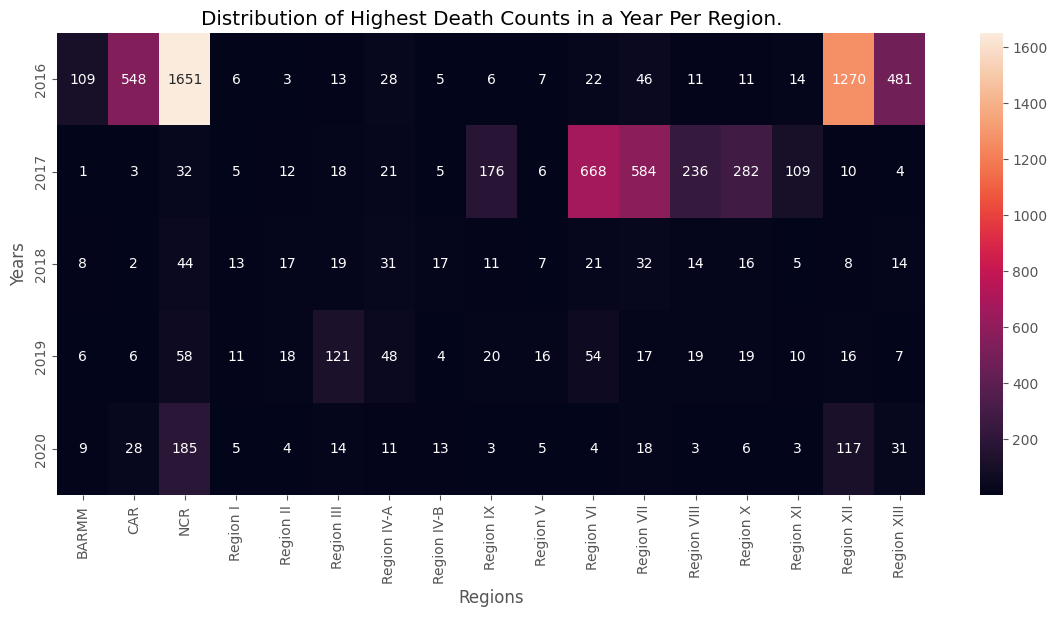

In [234]:
sns.heatmap(group_three, annot=True, fmt='g')
plt.title("Distribution of Highest Death Counts in a Year Per Region.")
plt.ylabel("Years")
plt.xlabel("Regions")
plt.gcf().set_size_inches(14,6)
plt.show()

<h3><span style='color: #52b788'>Insight # 20: </span> The highest number of dengue deaths in NCR consistently stands out, with a peak of 1,651 deaths in 2016. This suggests that NCR is a critical hotspot for severe dengue outbreaks, likely due to factors such as population density, healthcare infrastructure, or environmental conditions.</h3>

<h3><span style='color: #52b788'>Insight # 21: </span> Regions like BARMM and REGION I show relatively lower death counts compared to other regions. For example, BARMM had only 1 death in 2017, indicating that these regions may have better preventive measures or less favorable conditions for dengue transmission.</h3>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>